## Time Series 2 HW 1
- Your team is tasked with forecasting the electric load for American Electric Power Co. (AEP), one of the major electricity suppliers in mid-Atlantic. 

- Specifically, you will be forecasting hourly energy load for the Appalachian Power Territory of AEP. Electricity load by a power supplier need forecasts to better meet the needs of customers and prepare for operational expenses.

- You are to forecast hourly energy usage for October 25, 2024 – October 31, 2024. Every week you will be sent the updated data with the latest week’s energy data through October 24, 2024.

### Phases:
- Phase 1 – Exponential smoothing and seasonal ARIMA models

- Phase 2 – Prophet and neural network models

- Final Phase – Additional model as well as overall comparison of all modeling
approaches used.

### Phase 1:
- The data contains monthly information with an annual seasonal component: 
>>Feel free to try different approaches to account for the seasonality. 

>>Explain which approach you use and why.

- Build an appropriate Exponential Smoothing Model.
>> Forecast this model for your validation set only.

>> Calculate the MAE and MAPE for the validation set.

- Build a seasonal ARIMA model.
>>Describe the approach you used to select the lags of the model. 

>>Forecast this model for your validation set only.

>>Calculate the MAE and MAPE for the validation set.

In [1]:
import pandas as pd

In [2]:
ts_df = pd.read_csv("hrl_load_metered.csv")
ts_df.head()

,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,1/1/18 0:00,RFC,WEST,AEP,AEPAPT,6787.226,True
1,1/1/18 1:00,RFC,WEST,AEP,AEPAPT,6909.472,True
2,1/1/18 2:00,RFC,WEST,AEP,AEPAPT,7004.748,True
3,1/1/18 3:00,RFC,WEST,AEP,AEPAPT,7093.771,True
4,1/1/18 4:00,RFC,WEST,AEP,AEPAPT,7244.769,True


In [3]:
ts_df.load_area.value_counts()

load_area
AEPAPT    58727
Name: count, dtype: int64

In [4]:
ts_df_rdx = ts_df.drop(columns=['is_verified', 'nerc_region', 'mkt_region','zone','load_area'])

In [7]:
ts_df_rdx.head(20)

,datetime_beginning_ept,mw
0,1/1/18 0:00,6787.226
1,1/1/18 1:00,6909.472
2,1/1/18 2:00,7004.748
3,1/1/18 3:00,7093.771
4,1/1/18 4:00,7244.769
5,1/1/18 5:00,7417.118
6,1/1/18 6:00,7582.691
7,1/1/18 7:00,7713.160
8,1/1/18 8:00,7690.264
9,1/1/18 9:00,7445.724


In [9]:
ts_df_rdx['datetime_beginning_ept'] = pd.to_datetime(ts_df_rdx['datetime_beginning_ept'], format='mixed')

In [10]:
ts_df_rdx.head(25)

,datetime_beginning_ept,mw
0,2018-01-01 00:00:00,6787.226
1,2018-01-01 01:00:00,6909.472
2,2018-01-01 02:00:00,7004.748
3,2018-01-01 03:00:00,7093.771
4,2018-01-01 04:00:00,7244.769
5,2018-01-01 05:00:00,7417.118
6,2018-01-01 06:00:00,7582.691
7,2018-01-01 07:00:00,7713.160
8,2018-01-01 08:00:00,7690.264
9,2018-01-01 09:00:00,7445.724


In [11]:
ts_df_rdx.set_index(ts_df_rdx.datetime_beginning_ept, inplace=True)
ts_df_rdx.head()

,datetime_beginning_ept,mw
datetime_beginning_ept,,
2018-01-01 00:00:00,2018-01-01 00:00:00,6787.226
2018-01-01 01:00:00,2018-01-01 01:00:00,6909.472
2018-01-01 02:00:00,2018-01-01 02:00:00,7004.748
2018-01-01 03:00:00,2018-01-01 03:00:00,7093.771
2018-01-01 04:00:00,2018-01-01 04:00:00,7244.769


In [13]:
ts_df_rdx.index.name = None

In [14]:
ts_df_rdx.head()

,datetime_beginning_ept,mw
2018-01-01 00:00:00,2018-01-01 00:00:00,6787.226
2018-01-01 01:00:00,2018-01-01 01:00:00,6909.472
2018-01-01 02:00:00,2018-01-01 02:00:00,7004.748
2018-01-01 03:00:00,2018-01-01 03:00:00,7093.771
2018-01-01 04:00:00,2018-01-01 04:00:00,7244.769


In [15]:
ts_df_rdx.drop(columns='datetime_beginning_ept', inplace=True)

In [16]:
ts_df_rdx.head()

,mw
2018-01-01 00:00:00,6787.226
2018-01-01 01:00:00,6909.472
2018-01-01 02:00:00,7004.748
2018-01-01 03:00:00,7093.771
2018-01-01 04:00:00,7244.769


In [17]:
ts_df_rdx.shape

(58727, 1)

In [19]:
# drop duplicates due to daylight savings
deduped = ts_df_rdx.reset_index()
deduped.drop_duplicates(subset=['index'], keep='first', inplace=True)
deduped.set_index('index', inplace=True)

In [20]:
deduped.head()

,mw
index,
2018-01-01 00:00:00,6787.226
2018-01-01 01:00:00,6909.472
2018-01-01 02:00:00,7004.748
2018-01-01 03:00:00,7093.771
2018-01-01 04:00:00,7244.769


In [21]:
deduped.index.name = None

In [22]:
deduped.head()

,mw
2018-01-01 00:00:00,6787.226
2018-01-01 01:00:00,6909.472
2018-01-01 02:00:00,7004.748
2018-01-01 03:00:00,7093.771
2018-01-01 04:00:00,7244.769


In [23]:
deduped.shape

(58721, 1)

In [25]:
deduped.index.min()

Timestamp('2018-01-01 00:00:00')

In [24]:
deduped.index.max()

Timestamp('2024-09-12 23:00:00')

#### Takeaway: dropped 6 rows
- makes sense, we have 6 years of data, and there are 6 instances of 1 added hour each year
- next we need to add in the missing hours. Let's check for those missing data points

In [28]:
# check for missing data points
full_date_range = pd.date_range(start=deduped.index.min(), end=deduped.index.max(), freq='H')

gaps = full_date_range.difference(deduped.index)

In [29]:

if not gaps.empty:
    print(f"gaps: {gaps}")
else:
    print("No gaps")

gaps: DatetimeIndex(['2018-03-11 02:00:00', '2019-03-10 02:00:00',
               '2020-03-08 02:00:00', '2021-03-14 02:00:00',
               '2022-03-13 02:00:00', '2023-03-12 02:00:00',
               '2024-03-10 02:00:00'],
              dtype='datetime64[ns]', freq=None)


In [30]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [31]:
# now add in the missing hourly data, using df.asfreq()
deduped_and_filled = deduped
deduped_and_filled = deduped_and_filled.asfreq('H')

# next we can fill the missing values, using a spline interpolation
deduped_and_filled.head()

,mw
2018-01-01 00:00:00,6787.226
2018-01-01 01:00:00,6909.472
2018-01-01 02:00:00,7004.748
2018-01-01 03:00:00,7093.771
2018-01-01 04:00:00,7244.769


In [32]:
# now rerun the gap analysis
full_date_range = pd.date_range(start=deduped_and_filled.index.min(), end=deduped_and_filled.index.max(), freq='H')

gaps = full_date_range.difference(deduped_and_filled.index)

if not gaps.empty:
    print(f"gaps: {gaps}")
else:
    print("No gaps")

No gaps


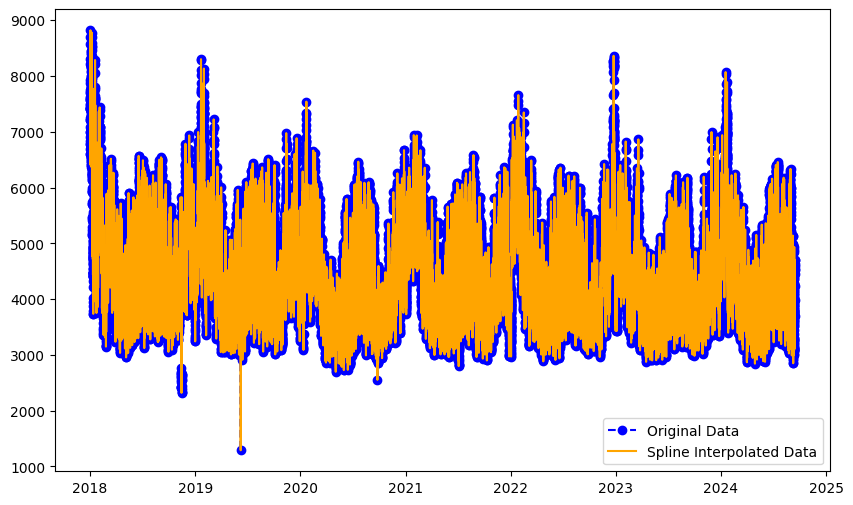

mw    0
dtype: int64


In [34]:
# Drop rows where all values are NaN before interpolation
df_valid = deduped_and_filled.dropna(subset=['mw'])

# Perform spline interpolation
spline_interpolator = interpolate.InterpolatedUnivariateSpline(df_valid.index.astype(int), df_valid['mw'], k=2)

# Fill missing values in the original df using the spline interpolator
deduped_and_filled['mw'] = deduped_and_filled['mw'].combine_first(pd.Series(spline_interpolator(deduped_and_filled.index.astype(int)), index=deduped_and_filled.index))

# 5. Plot the original data with the interpolated values
plt.figure(figsize=(10, 6))
plt.plot(df_valid.index, df_valid['mw'], label='Original Data', marker='o', linestyle='--', color='blue')
plt.plot(deduped_and_filled.index, deduped_and_filled['mw'], label='Spline Interpolated Data', color='orange')
plt.legend()
plt.show()

# Check for missing values again to ensure they were filled
print(deduped_and_filled.isna().sum())

In [35]:
#check the dataframe with the index of the previously empty values
deduped_and_filled[deduped_and_filled.index =='2020-03-08 02:00:00']

# good! it worked!

,mw
2020-03-08 02:00:00,4993.863129


In [40]:
print(deduped_and_filled.index.min())
print(deduped_and_filled.index.max())

2018-01-01 00:00:00
2024-09-12 23:00:00


In [ ]:
# final df code in TS
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

ts_df = pd.read_csv("hrl_load_metered.csv")

#drop unused columns
ts_df_rdx = ts_df.drop(columns=['is_verified', 'nerc_region', 'mkt_region','zone','load_area'])

# set time as datetime 
ts_df_rdx['datetime_beginning_ept'] = pd.to_datetime(ts_df_rdx['datetime_beginning_ept'], format='mixed')

# set the index as the datetime column
ts_df_rdx.set_index(ts_df_rdx.datetime_beginning_ept, inplace=True)

# drop column
ts_df_rdx.drop(columns='datetime_beginning_ept', inplace=True)

# drop duplicates due to daylight savings
deduped = ts_df_rdx.reset_index()
deduped.drop_duplicates(subset=['index'], keep='first', inplace=True)
deduped.set_index('index', inplace=True)

# check for missing data points
full_date_range = pd.date_range(start=deduped.index.min(), end=deduped.index.max(), freq='H')
gaps = full_date_range.difference(deduped.index)
if not gaps.empty:
    print(f"gaps: {gaps}")
else:
    print("No gaps")

# now add in the missing hourly data, using df.asfreq()
deduped_and_filled = deduped
deduped_and_filled = deduped_and_filled.asfreq('H')

# now rerun the gap analysis
full_date_range = pd.date_range(start=deduped_and_filled.index.min(), end=deduped_and_filled.index.max(), freq='H')

gaps = full_date_range.difference(deduped_and_filled.index)

if not gaps.empty:
    print(f"gaps: {gaps}")
else:
    print("No gaps")

# Drop rows where all values are NaN before interpolation
df_valid = deduped_and_filled.dropna(subset=['mw'])

# Perform spline interpolation
spline_interpolator = interpolate.InterpolatedUnivariateSpline(df_valid.index.astype(int), df_valid['mw'], k=2)

# Fill missing values in the original df using the spline interpolator
deduped_and_filled['mw'] = deduped_and_filled['mw'].combine_first(pd.Series(spline_interpolator(deduped_and_filled.index.astype(int)), index=deduped_and_filled.index))

# 5. Plot the original data with the interpolated values
plt.figure(figsize=(10, 6))
plt.plot(df_valid.index, df_valid['mw'], label='Original Data', marker='o', linestyle='--', color='blue')
plt.plot(deduped_and_filled.index, deduped_and_filled['mw'], label='Spline Interpolated Data', color='orange')
plt.legend()
plt.show()

# Check for missing values again to ensure they were filled
print(deduped_and_filled.isna().sum())

#check the dataframe with the index of the previously empty values
deduped_and_filled[deduped_and_filled.index =='2020-03-08 02:00:00']